In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\ExcelR_Assignments\Decision_Trees\Datasets\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

<Axes: >

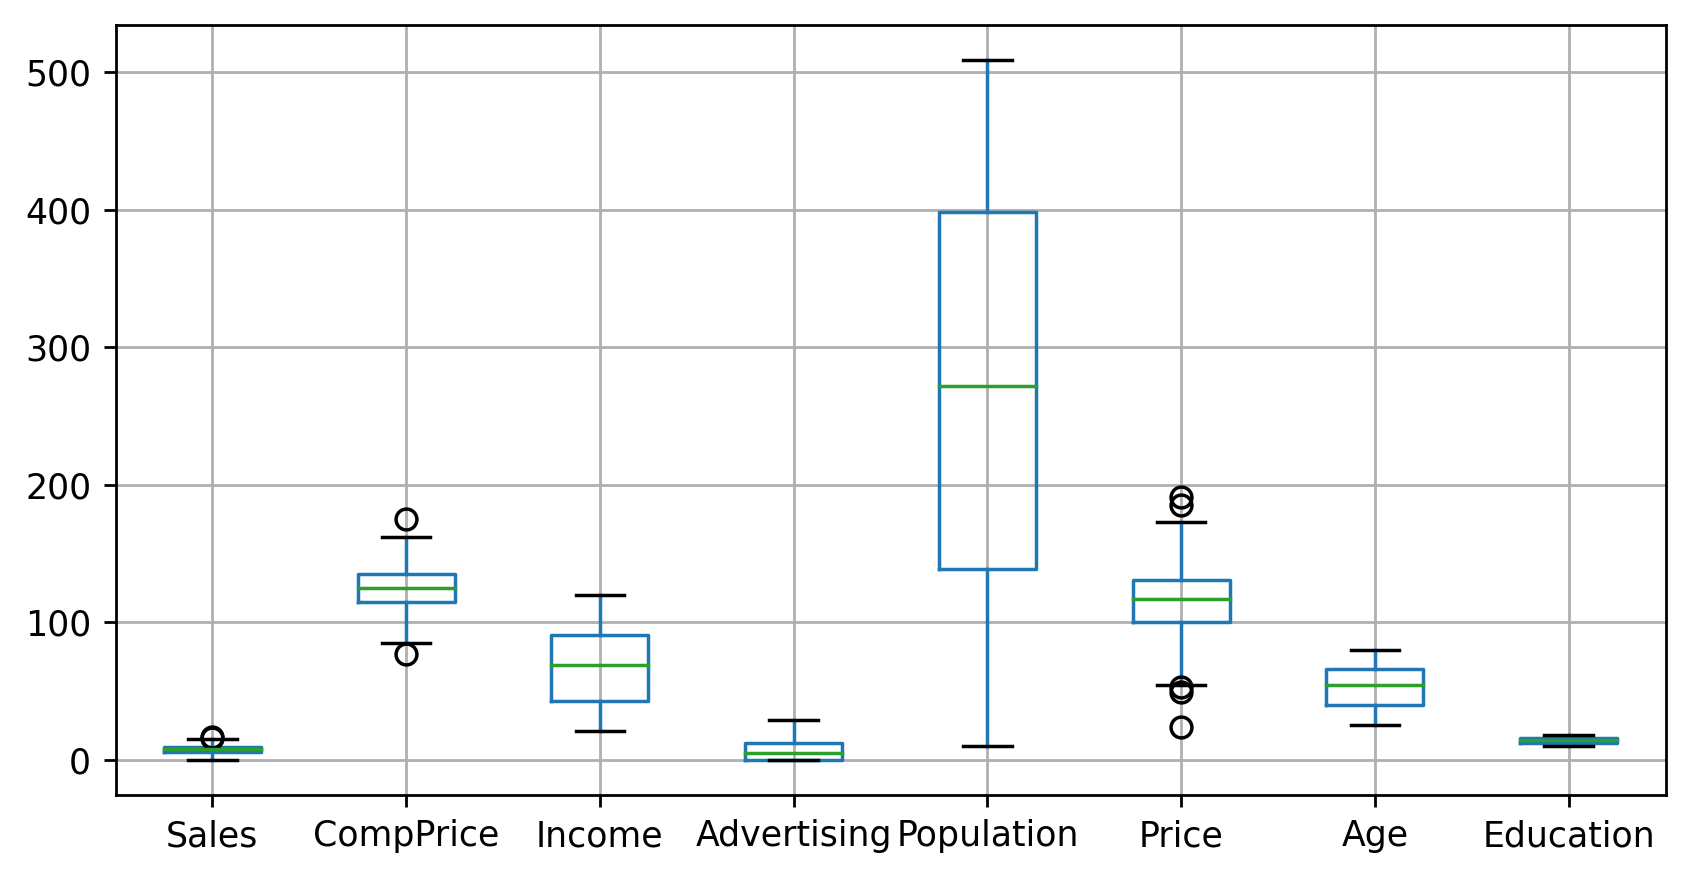

In [7]:
df.boxplot()

In [8]:
# Converting Sales column to categorical

In [9]:
threshold = 7.496325
df['Sales'] = pd.cut(df['Sales'], bins=[float('-inf'), threshold, float('inf')], labels=['low', 'high'])

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,low,139,23,3,37,120,Medium,55,11,No,Yes
397,low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
df['Sales'].value_counts()

low     201
high    199
Name: Sales, dtype: int64

In [12]:
# Converting categorial columns(Features) to numerical 

In [13]:
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,high,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,high,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,high,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,low,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,low,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,low,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,low,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,low,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [14]:
df.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864
ShelveLoc_Medium,0.008683,-0.051392,-0.015929,-0.040640,-0.006607,0.056613,0.013242,-0.618133,-0.571396,1.000000,0.037391,-0.037391,0.065656,-0.065656


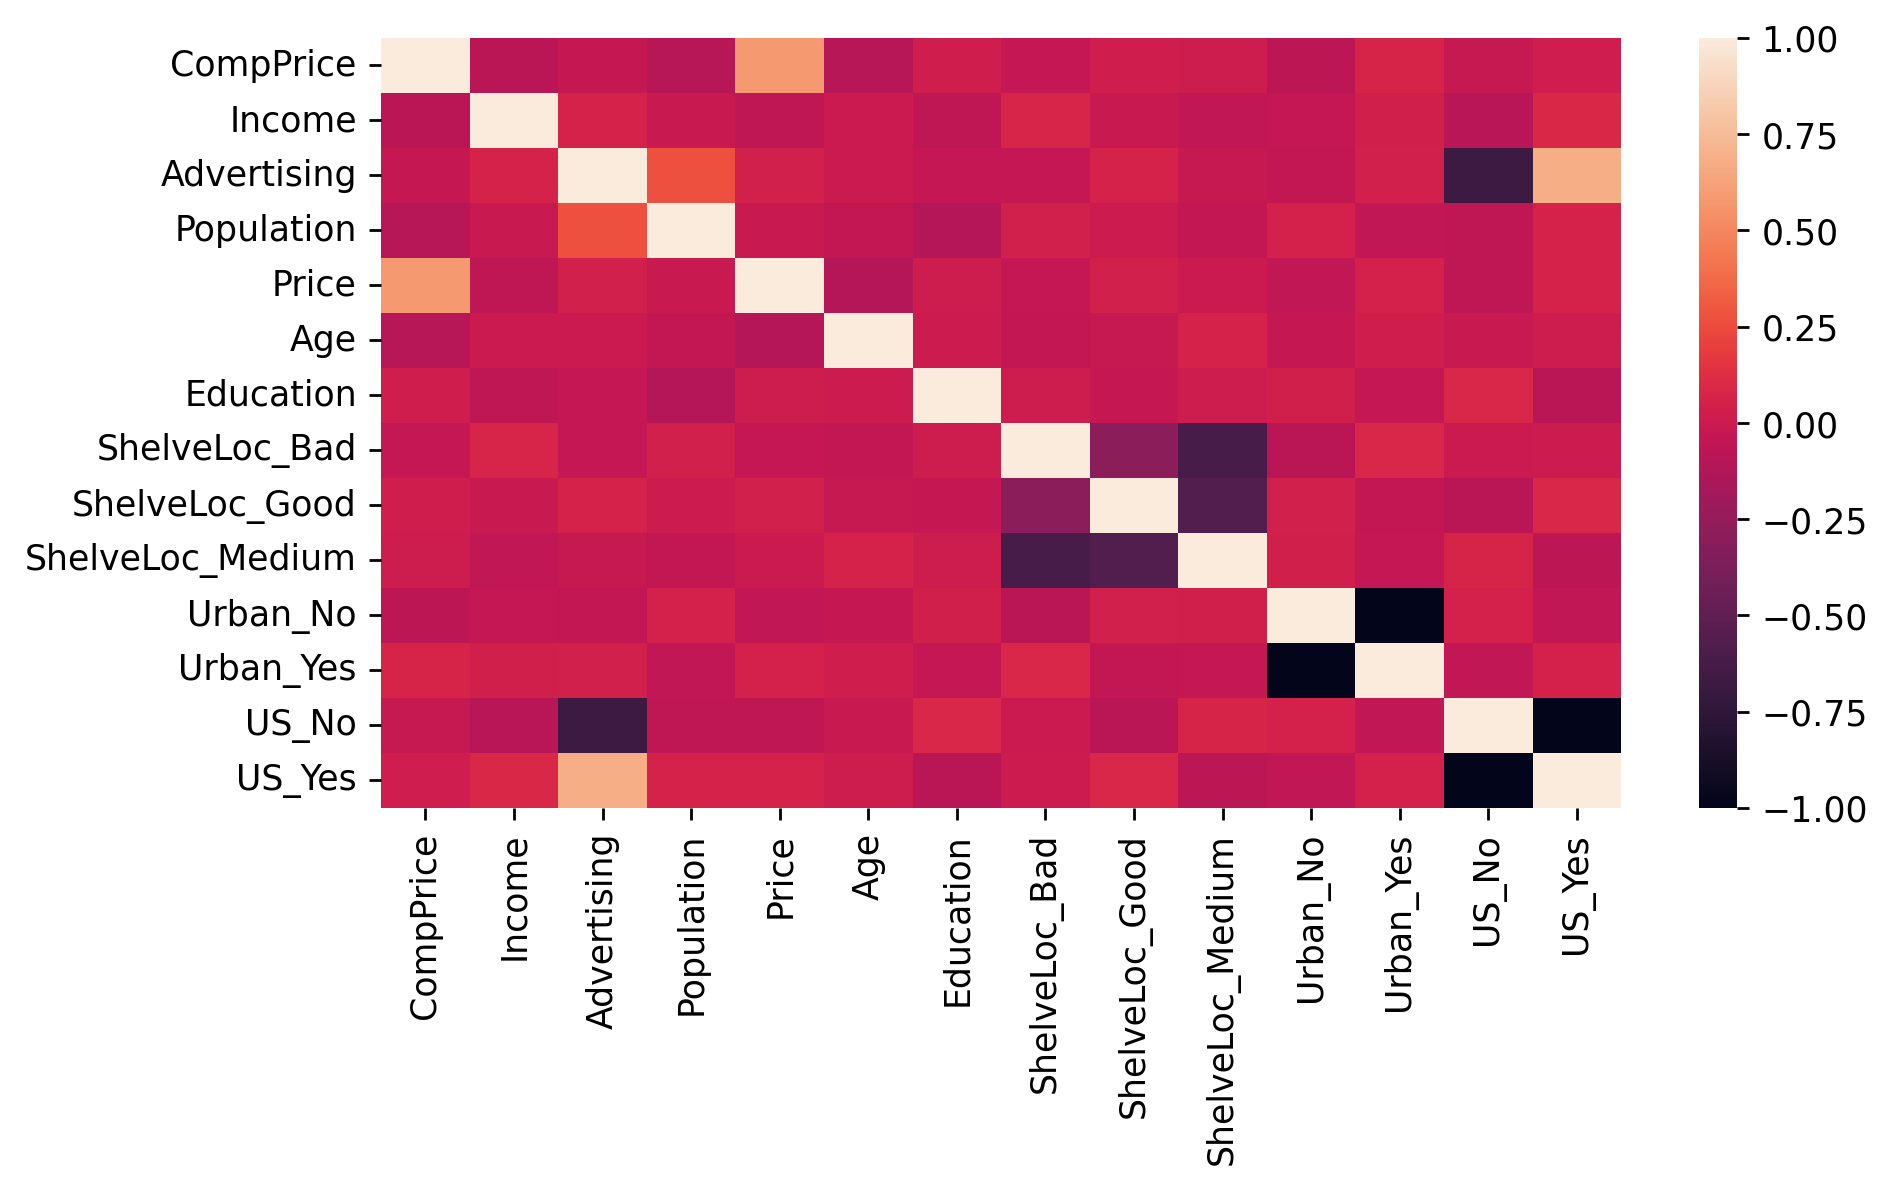

In [15]:
sns.heatmap(df.corr())
plt.show()

In [16]:
# Spliting of Data 

In [17]:
x = df.iloc[:,1:]
y = df['Sales']

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [19]:
# Model Building

In [20]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
ypred

array(['low', 'high', 'low', 'high', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'high',
       'low', 'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low',
       'low', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'low', 'low',
       'low', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'high', 'high', 'low',
       'high', 'high', 'high', 'low', 'low', 'low', 'low', 'high', 'low',
       'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'high', 'low'], dtype=object)

In [21]:
# Model Evaluation

In [22]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        high       0.71      0.72      0.72        40
         low       0.72      0.70      0.71        40

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80



In [23]:
confusion_matrix(ytest, ypred)

array([[29, 11],
       [12, 28]], dtype=int64)

In [24]:
print('Training Accuracy =', dt.score(xtrain, ytrain))
print('Testing Accuracy =', dt.score(xtest, ytest))

Training Accuracy = 1.0
Testing Accuracy = 0.7125


In [25]:
# Here it looks like model is overfitted because there is more than 3% of difference in traing and testing accuracy
# as seen in confusion matrix 29 data points are not classified correctly

In [29]:
# Visualizing Decision Tree

In [30]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [31]:
df['Sales'].unique()

['high', 'low']
Categories (2, object): ['low' < 'high']

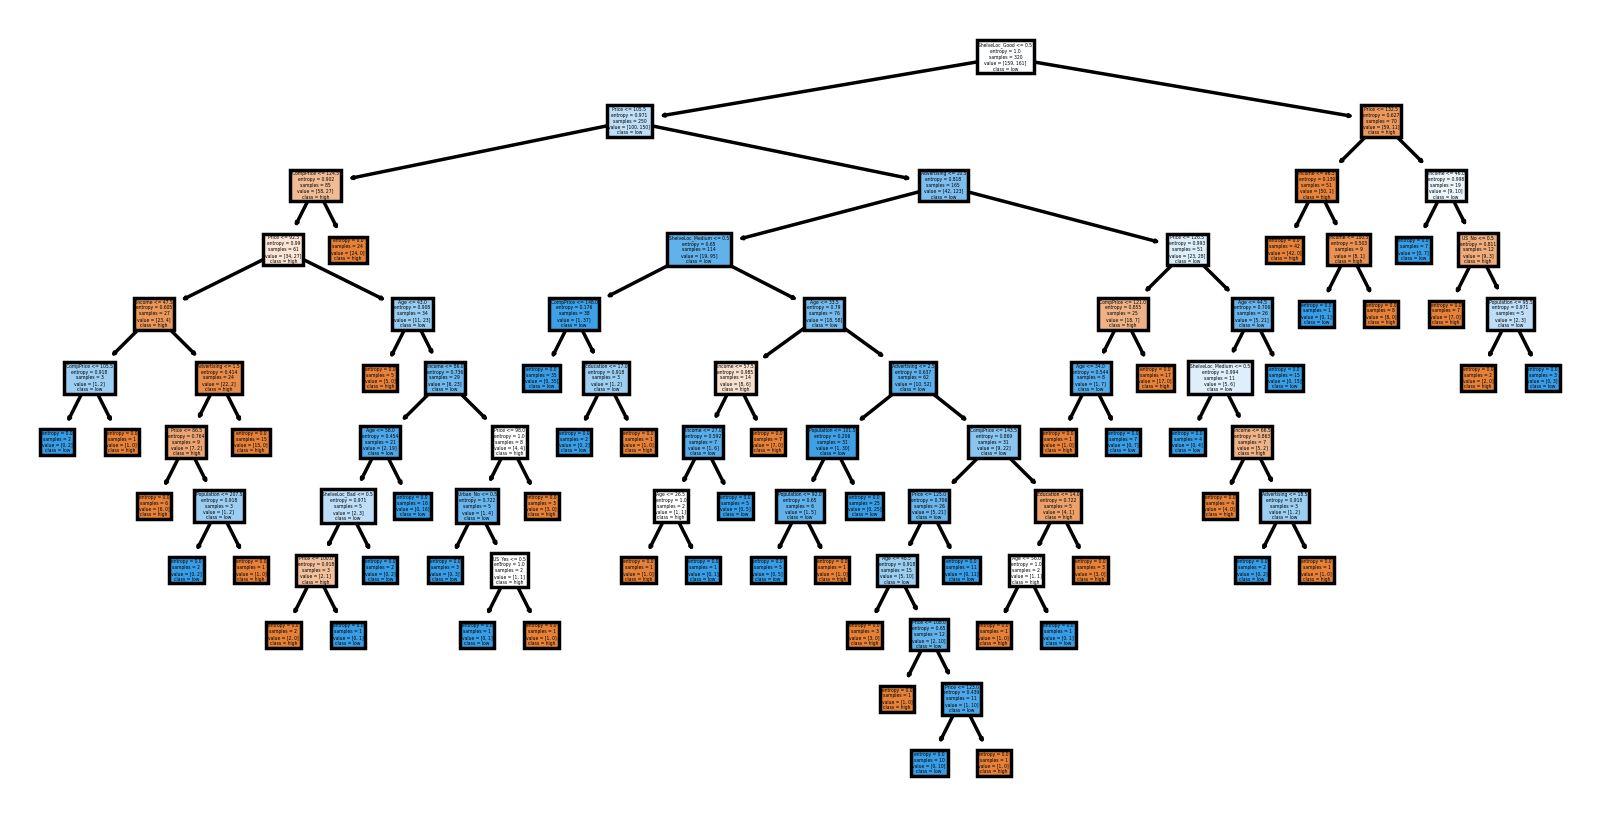

In [33]:
tree.plot_tree(dt, feature_names= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age','Education', 
                                   'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 
                                   'US_Yes'], 
               class_names=['high', 'low'], 
               filled=True)
plt.show()

In [34]:
dt.feature_importances_

array([0.14035963, 0.12145018, 0.06968386, 0.04369813, 0.30207014,
       0.13338753, 0.01363953, 0.00656226, 0.10416922, 0.0384468 ,
       0.00503027, 0.        , 0.01525226, 0.00625018])

In [36]:
pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': dt.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
4,Price,0.302070
0,CompPrice,0.140360
5,Age,0.133388
1,Income,0.121450
8,ShelveLoc_Good,0.104169
2,Advertising,0.069684
3,Population,0.043698
9,ShelveLoc_Medium,0.038447
12,US_No,0.015252
6,Education,0.013640


In [37]:
# Here we can see tha "Price" column is having highest Importance